In [116]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='keras')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16599 entries, 0 to 16598
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   States     16599 non-null  object        
 1   Regions    16599 non-null  object        
 2   latitude   16599 non-null  float64       
 3   longitude  16599 non-null  float64       
 4   Dates      16599 non-null  datetime64[ns]
 5   Usage      16599 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 778.2+ KB
None
           latitude     longitude                          Dates         Usage
count  16599.000000  16599.000000                          16599  16599.000000
mean      23.178220     81.794533  2019-09-25 13:27:18.966202624    103.001862
min        8.900373     71.192400            2019-01-02 00:00:00      0.300000
25%       19.820430     76.569993            2019-05-11 00:00:00      6.700000
50%       23.835404     78.570026          

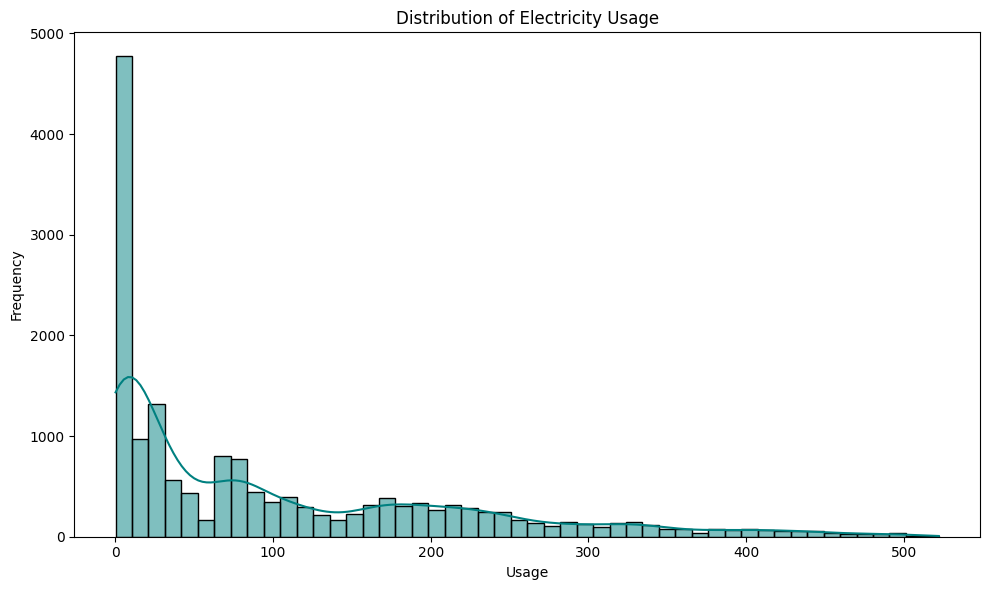

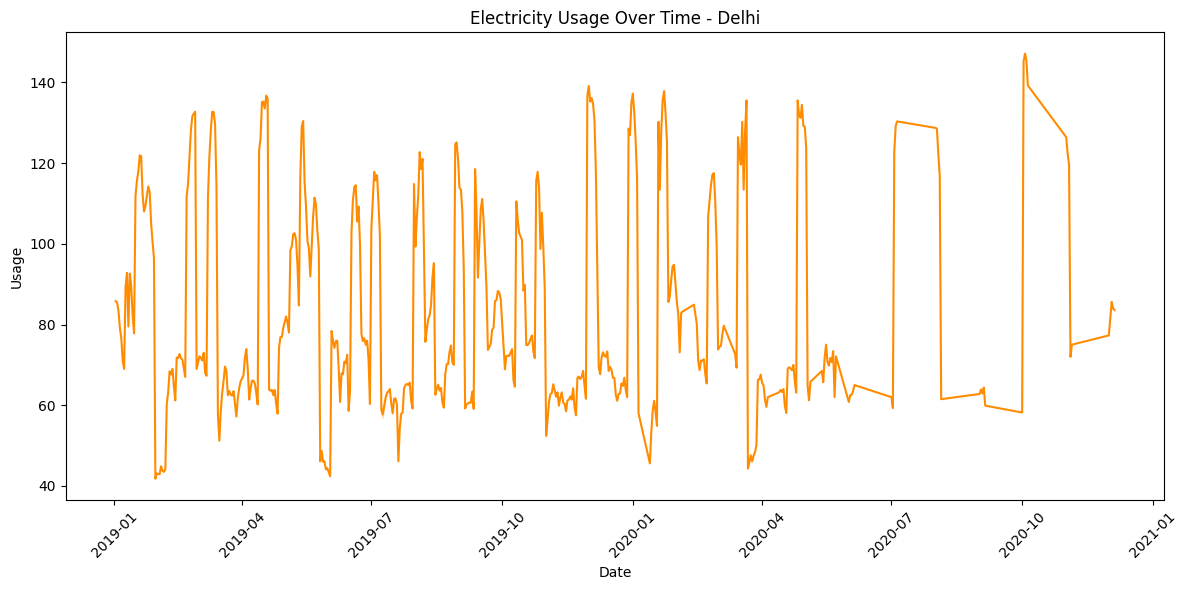

Mean Absolute Error: 9.499939339500859
R² Score: 0.973905779626028


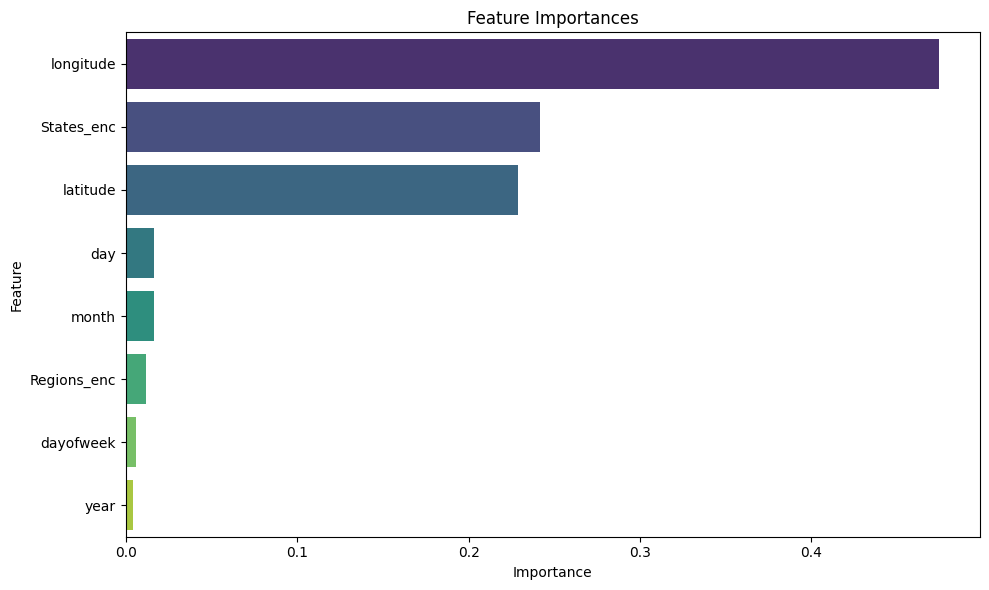

In [17]:
#Measurements of electric power consumption (data loading, subsetting, histograms, time series, plots).

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Step 2: Load Dataset
df = pd.read_csv("long_data_.csv")
df['Dates'] = pd.to_datetime(df['Dates'], dayfirst=True)


# Step 3: Basic Exploration
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())

# Step 4: Histogram of Usage
plt.figure(figsize=(10, 6))
sns.histplot(df['Usage'], bins=50, kde=True, color='teal')
plt.title('Distribution of Electricity Usage')
plt.xlabel('Usage')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Step 5: Time Series Plot for a Specific State (e.g., Delhi)
state_name = "Delhi"
plt.figure(figsize=(12, 6))
state_data = df[df['States'] == state_name]
sns.lineplot(data=state_data, x="Dates", y="Usage", color='darkorange')
plt.title(f"Electricity Usage Over Time - {state_name}")
plt.xlabel("Date")
plt.ylabel("Usage")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Feature Engineering
df['year'] = df['Dates'].dt.year
df['month'] = df['Dates'].dt.month
df['day'] = df['Dates'].dt.day
df['dayofweek'] = df['Dates'].dt.dayofweek

# Encode categorical features
le_states = LabelEncoder()
le_regions = LabelEncoder()
df['States_enc'] = le_states.fit_transform(df['States'])
df['Regions_enc'] = le_regions.fit_transform(df['Regions'])

# Step 7: Prepare Features and Target
features = ['latitude', 'longitude', 'year', 'month', 'day', 'dayofweek', 'States_enc', 'Regions_enc']
X = df[features]
y = df['Usage']

# Step 8: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 10: Evaluate Model
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Optional: Feature Importance
importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x='Importance', y='Feature', hue='Feature', legend=False, palette='viridis')
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


Gradient Descent Theta: [25.59528738  2.80623992]
Closed-form Theta: [214.07305451  -4.79205012]


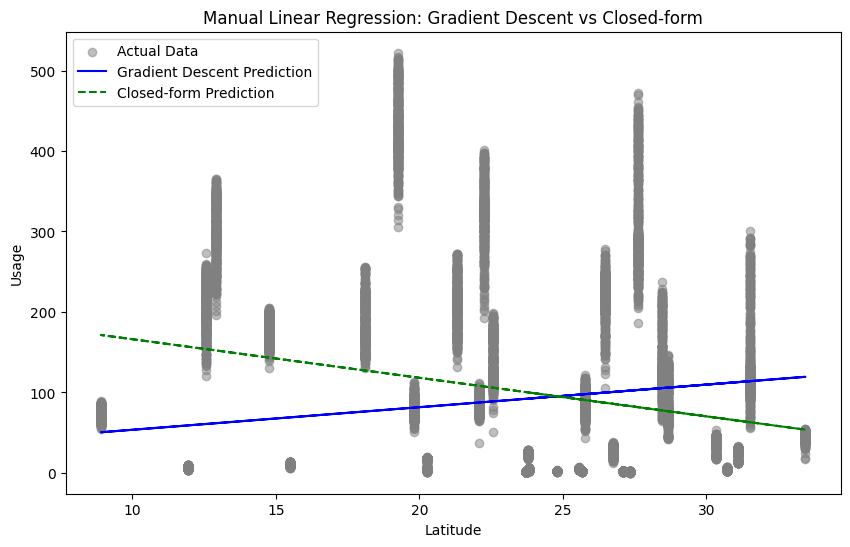

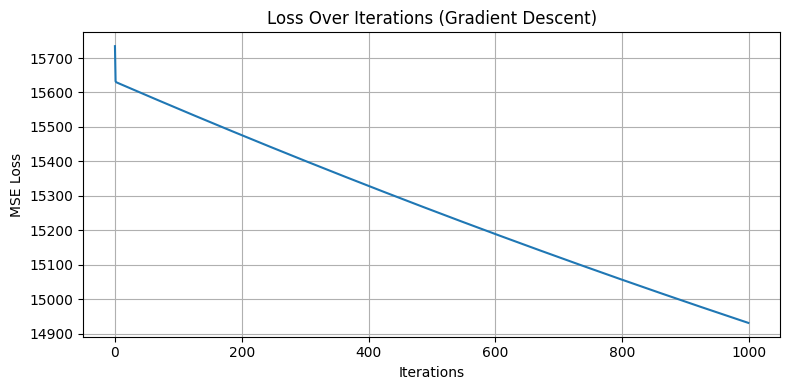

In [21]:
#Implement linear regression using gradient descent manually (without libraries like scikit-learn). Compare results with closed-form solutions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the data
df = pd.read_csv("long_data_.csv")
df['Dates'] = pd.to_datetime(df['Dates'], dayfirst=True)

# Simple regression: Predict Usage from Latitude
X = df[['latitude']].values
y = df['Usage'].values

# Add bias term (column of 1s) to X
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Shape: (n_samples, 2)

# --- 1. Gradient Descent Implementation ---

# Hyperparameters
learning_rate = 0.001
n_iterations = 1000
m = X_b.shape[0]

# Initialize theta (weights)
theta = np.random.randn(2, 1)

# Reshape y
y = y.reshape(-1, 1)

# Store loss history for plotting
loss_history = []

# Gradient descent loop
for i in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= learning_rate * gradients
    loss = np.mean((X_b.dot(theta) - y) ** 2)
    loss_history.append(loss)

# Final parameters
print("Gradient Descent Theta:", theta.ravel())

# --- 2. Closed-form solution (Normal Equation) ---
theta_closed_form = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Closed-form Theta:", theta_closed_form.ravel())

# --- 3. Compare predictions ---
y_pred_gd = X_b.dot(theta)
y_pred_closed = X_b.dot(theta_closed_form)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', alpha=0.5, label="Actual Data")
plt.plot(X, y_pred_gd, color='blue', label="Gradient Descent Prediction")
plt.plot(X, y_pred_closed, color='green', linestyle='--', label="Closed-form Prediction")
plt.xlabel("Latitude")
plt.ylabel("Usage")
plt.title("Manual Linear Regression: Gradient Descent vs Closed-form")
plt.legend()
plt.show()

# Optional: Plot Loss Curve
plt.figure(figsize=(8, 4))
plt.plot(loss_history)
plt.title("Loss Over Iterations (Gradient Descent)")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.tight_layout()
plt.show()


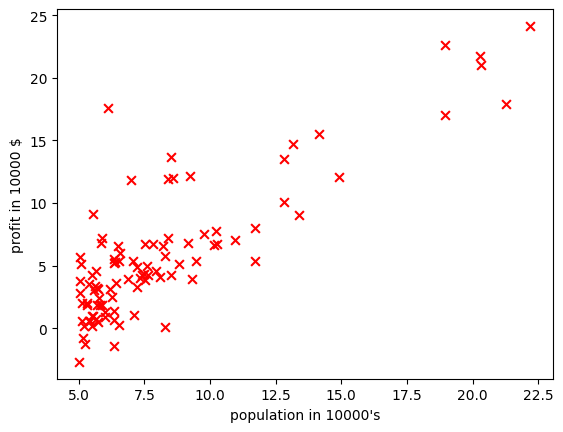

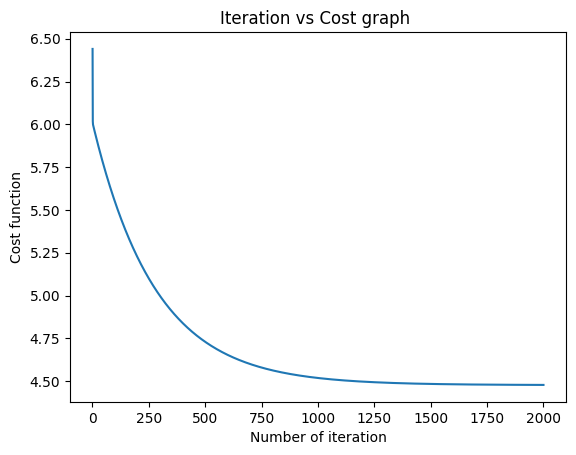

profit from 35000 people city is  3520.2710412366578 $
profit from 5000 people city is  50794.211724522866 $


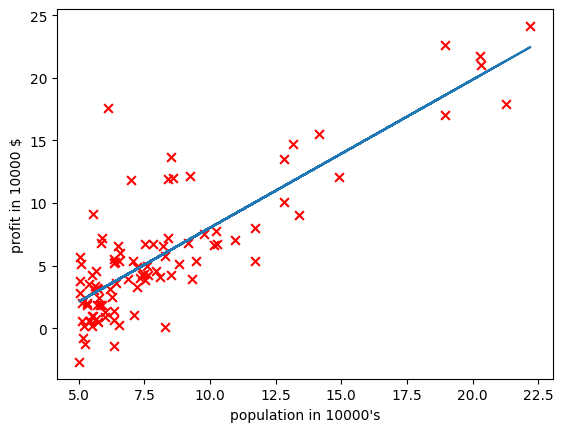

In [37]:
#Linear regression with one variable (food truck profits).
import numpy as np
import matplotlib.pyplot as plt
#load data from text file
data = np.loadtxt("foodtruckprofits.txt",delimiter=",")
data = np.array(data)
#seperate the input (X) and output (Y)
X = data[::,:1]
Y = data[::,1:]
#Scatter plot of dataset to show how its actually looks
plt.scatter(X.transpose(),Y.transpose(),40,color="red",marker="x")
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.show()
#######################
# introduce weights of hypothesis (randomly initialize)
Theta = np.random.rand(1,2)
# m is total example set , n is number of features
m,n = X.shape
# add bias to input matrix by simple make X0 = 1 for all
X_bias = np.ones((m,2))
X_bias[::,1:] = X
# output first 5 X_bias examples
X_bias[0:5,:]
####################
#define function to find cost
def cost(X_bias,Y,Theta):
    m,n = X.shape
    hypothesis = X_bias.dot(Theta.transpose())
    return (1/(2.0*m))*((np.square(hypothesis-Y)).sum(axis=0))
#function gradient descent algorithm from minimizing theta
def gradientDescent(X_bias,Y,Theta,iterations,alpha):
    count = 1
    cost_log = np.array([])
    while(count <= iterations):
        hypothesis = X_bias.dot(Theta.transpose())
        temp0 = Theta[0,0] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,0:1])).sum(axis=0)
        temp1 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,-1:])).sum(axis=0)
        Theta[0,0] = temp0.item()
        Theta[0,1] = temp1.item()
        cost_log = np.append(cost_log,cost(X_bias,Y,Theta))
        count = count + 1
    plt.plot(np.linspace(1,iterations,iterations,endpoint=True),cost_log)
    plt.title("Iteration vs Cost graph ")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost function")
    plt.show()
    return Theta
alpha = 0.01
iterations = 2000 #the value of iterations is 1500 enough. 2000 uses for demonstration
Theta = gradientDescent(X_bias,Y,Theta,iterations,alpha)
#############3
# predict the profit for city with 35000 and 75000 people
X_test = np.array([[1,3.5],[1,7.5]])
hypothesis = X_test.dot(Theta.transpose())
print ('profit from 35000 people city is ',hypothesis[0,0]*10000,'$')
print ('profit from 5000 people city is ',hypothesis[1,0]*10000,'$')
############
# Plot showing hypothesis 
plt.scatter(X.transpose(),Y.transpose(),40,color="red",marker="x")
X_axis = X
Y_axis = X_bias.dot(Theta.transpose())
plt.plot(X_axis,Y_axis)
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.show()

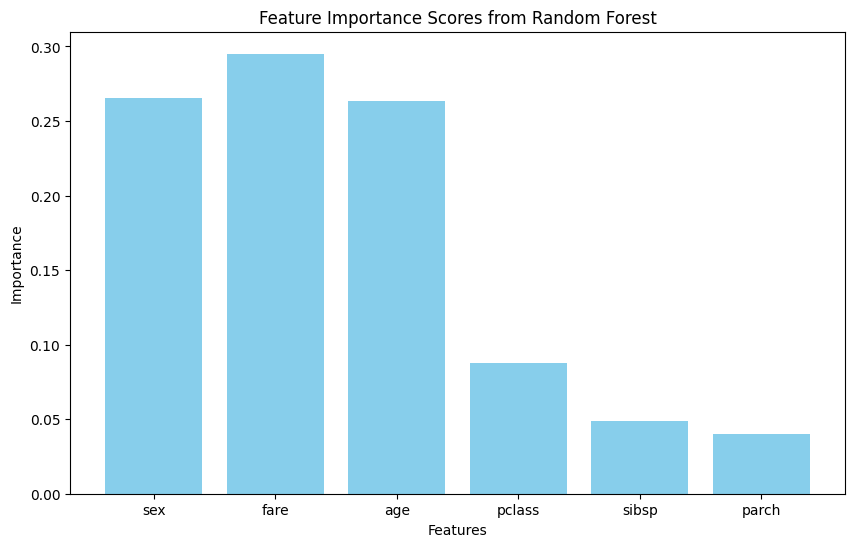

{'sex': 0.26530096588145485, 'fare': 0.295144313994554, 'age': 0.26310147025244535, 'pclass': 0.08756732220989773, 'sibsp': 0.04880356938055662, 'parch': 0.04008235828109167}


In [47]:
#Train a random forest on a dataset (e.g., Titanic survival). Extract and visualize feature importance scores.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Preprocessing
titanic['age'].fillna(titanic['age'].median())
titanic.dropna(subset=['embarked'], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
titanic['sex'] = le_sex.fit_transform(titanic['sex'])

le_embarked = LabelEncoder()
titanic['embarked'] = le_embarked.fit_transform(titanic['embarked'])

# Select features and target
features = ['sex', 'fare', 'age', 'pclass', 'sibsp', 'parch']
X = titanic[features]
y = titanic['survived']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
rf = RandomForestClassifier(random_state=28)
rf.fit(X_train, y_train)

# Extract feature importances
importances = rf.feature_importances_
feature_names = features

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Scores from Random Forest')
plt.show()

# Output feature importances as dictionary
feature_importance_dict = dict(zip(feature_names, importances))
print(feature_importance_dict)


AdaBoost Accuracy: 0.96


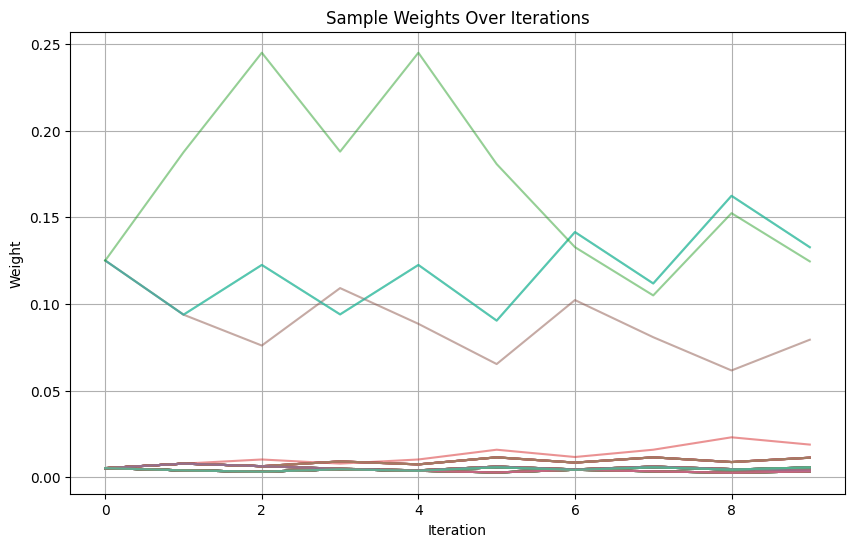

In [53]:
#Implement AdaBoost for binary classification. Train weak learners sequentially and observe how weights are updated.import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate binary data
X, y = make_classification(n_samples=100, n_features=1, n_informative=1,
                           n_redundant=0, n_clusters_per_class=1, flip_y=0.1, random_state=42)
y = np.where(y == 0, -1, 1)

class DecisionStump:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.polarity = 1

    def predict(self, X):
        n = X.shape[0]
        predictions = np.ones(n)
        if self.polarity == 1:
            predictions[X[:, self.feature_index] < self.threshold] = -1
        else:
            predictions[X[:, self.feature_index] > self.threshold] = -1
        return predictions

class AdaBoost:
    def __init__(self, n_estimators=10):
        self.n_estimators = n_estimators
        self.learners = []
        self.alphas = []
        self.weight_history = []

    def fit(self, X, y):
        n = X.shape[0]
        w = np.ones(n) / n

        for _ in range(self.n_estimators):
            stump = DecisionStump()
            min_error = float('inf')

            for feature_i in range(X.shape[1]):
                feature_values = np.unique(X[:, feature_i])
                for threshold in feature_values:
                    for polarity in [1, -1]:
                        predictions = np.ones(n)
                        if polarity == 1:
                            predictions[X[:, feature_i] < threshold] = -1
                        else:
                            predictions[X[:, feature_i] > threshold] = -1
                        error = np.sum(w[y != predictions])

                        if error < min_error:
                            min_error = error
                            stump.feature_index = feature_i
                            stump.threshold = threshold
                            stump.polarity = polarity

            EPS = 1e-10
            alpha = 0.5 * np.log((1 - min_error) / (min_error + EPS))
            predictions = stump.predict(X)
            w *= np.exp(-alpha * y * predictions)
            w /= np.sum(w)

            # Save everything
            self.learners.append(stump)
            self.alphas.append(alpha)
            self.weight_history.append(w.copy())  # save weight snapshot

    def predict(self, X):
        final_pred = np.zeros(X.shape[0])
        for alpha, stump in zip(self.alphas, self.learners):
            final_pred += alpha * stump.predict(X)
        return np.sign(final_pred)

# Train AdaBoost
model = AdaBoost(n_estimators=10)
model.fit(X, y)
# Accuracy
accuracy = np.mean(y_pred == y)
print(f"AdaBoost Accuracy: {accuracy:.2f}")

# Plot sample weights evolution
plt.figure(figsize=(10, 6))
for i in range(len(model.weight_history[0])):
    weights = [w[i] for w in model.weight_history]
    plt.plot(weights, label=f"Sample {i}", alpha=0.5)
plt.title("Sample Weights Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Weight")
plt.grid(True)
plt.show()


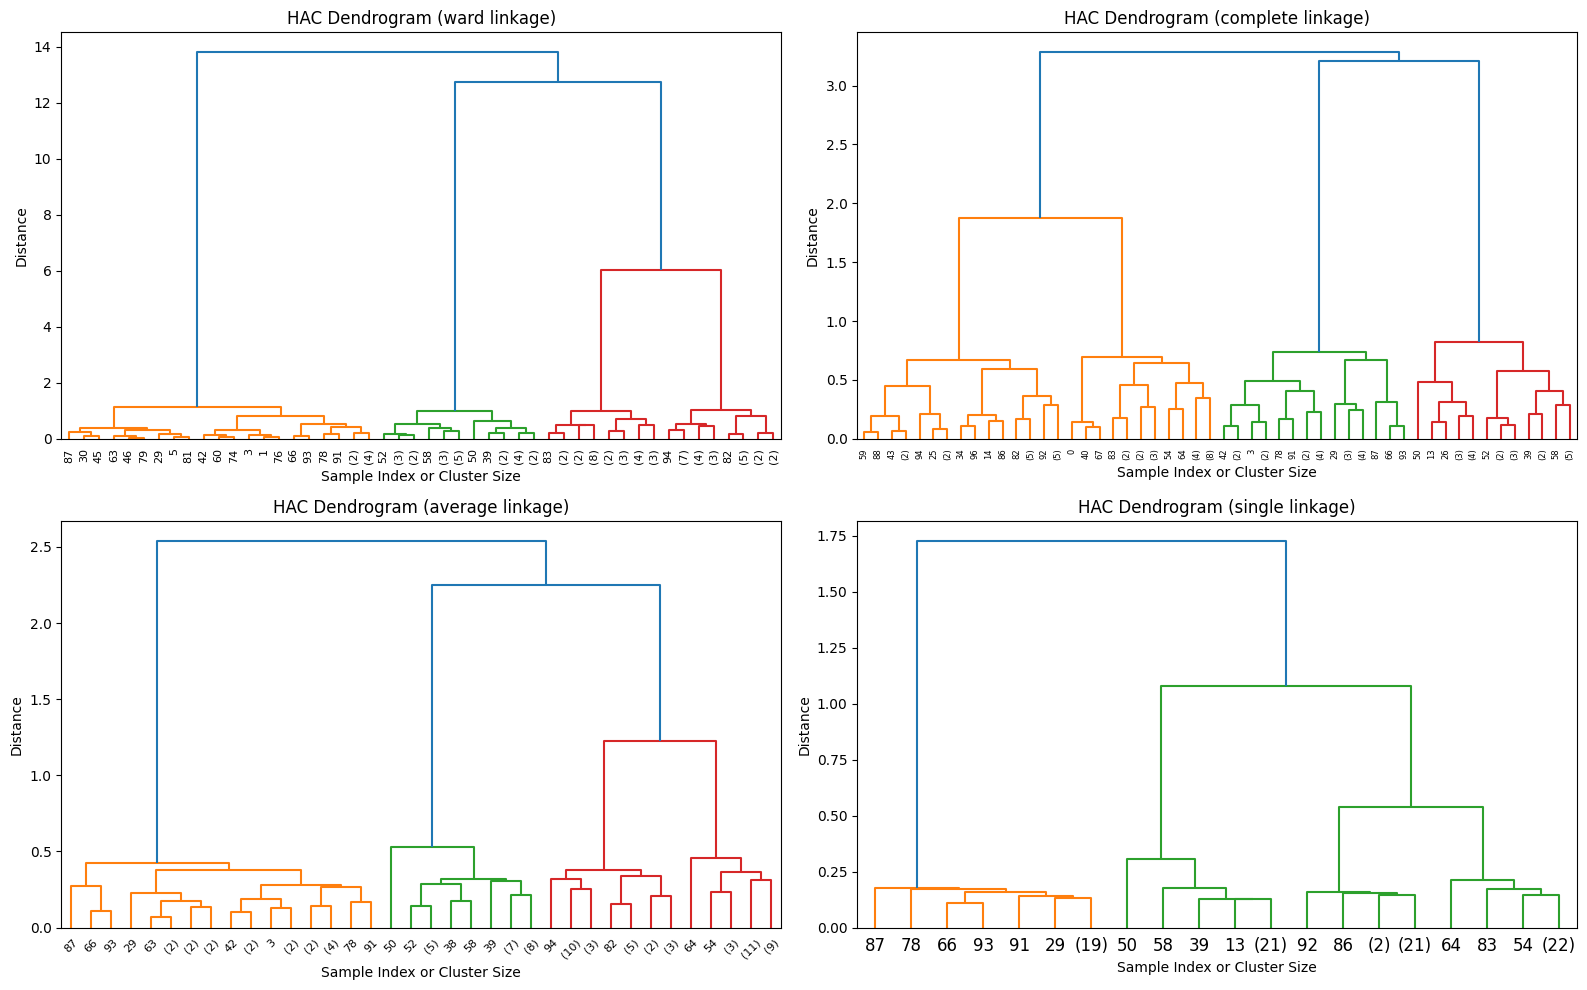

In [63]:
#Perform (Hierarchical Agglomerative Clustering)HAC on a dataset (e.g., customer segmentation). Visualize dendrograms and experiment with different linkage methods.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Step 1: Simulated Customer Data
X, _ = make_blobs(n_samples=100, centers=4, cluster_std=1.0, random_state=42)
df = pd.DataFrame(X, columns=["Annual Income", "Spending Score"])

# Step 2: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 3: Try different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

plt.figure(figsize=(16, 10))
for i, method in enumerate(linkage_methods):
    plt.subplot(2, 2, i+1)
    Z = linkage(X_scaled, method=method)
    dendrogram(Z, truncate_mode='level', p=5)
    plt.title(f'HAC Dendrogram ({method} linkage)')
    plt.xlabel('Sample Index or Cluster Size')
    plt.ylabel('Distance')
plt.tight_layout()
plt.show()


Explained variance ratio: [0.12033916 0.09561054]


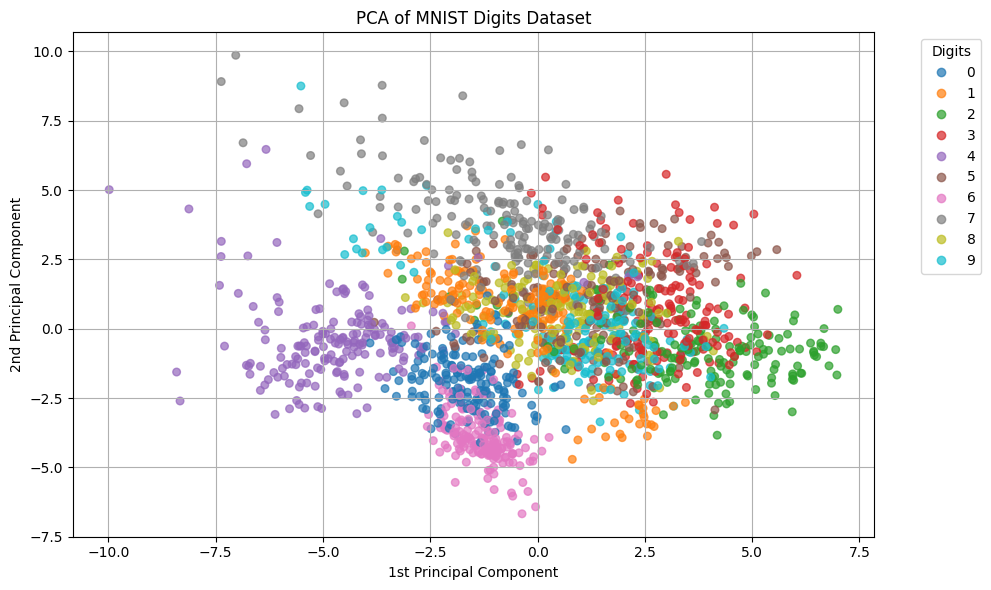

In [65]:
#Apply PCA to reduce dimensionality of a dataset (e.g., MNIST digits). Visualize the first two principal components.
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Step 1: Load the MNIST digits dataset (1797 images, 8x8 pixels)
digits = load_digits()
X = digits.data  # shape: (1797, 64)
y = digits.target  # labels: 0–9

# Step 2: Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Step 4: Visualize the first 2 principal components
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', s=30, alpha=0.7)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('PCA of MNIST Digits Dataset')
plt.legend(*scatter.legend_elements(), title="Digits", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [73]:
#Implement a simple neural network (one hidden layer) for binary classification (e.g., XOR problem). Use backpropagation to train the model.
import numpy as np

# XOR data
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

# Activations
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Network architecture
input_size = 2
hidden_size = 4
output_size = 1
lr = 0.1
epochs = 10000

# Initialize weights
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Loss
    loss = np.mean((y - a2)**2)

    # Backpropagation
    error = y - a2
    d_a2 = error * sigmoid_derivative(a2)

    d_hidden = d_a2.dot(W2.T) * relu_derivative(z1)

    # Gradient update
    W2 += a1.T.dot(d_a2) * lr
    b2 += np.sum(d_a2, axis=0, keepdims=True) * lr
    W1 += X.T.dot(d_hidden) * lr
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr

    if epoch % 1000 == 0:
        print(f"Epoch {epoch} - Loss: {loss:.4f}")

# Final prediction
print("\nPredictions after training:")
print(a2.round())



Epoch 0 - Loss: 0.3554
Epoch 1000 - Loss: 0.0144
Epoch 2000 - Loss: 0.0034
Epoch 3000 - Loss: 0.0018
Epoch 4000 - Loss: 0.0012
Epoch 5000 - Loss: 0.0009
Epoch 6000 - Loss: 0.0007
Epoch 7000 - Loss: 0.0005
Epoch 8000 - Loss: 0.0005
Epoch 9000 - Loss: 0.0004

Predictions after training:
[[0.]
 [1.]
 [1.]
 [0.]]


In [81]:
#Build a Naive Bayes model for text classification (e.g., spam detection). Preprocess text data (tokenization, stopword removal, TF-IDF).
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Sample dataset
data = {
    'text': [
        "Win a $1000 cash prize now!",
        "Hey, are we still on for dinner?",
        "Congratulations, you won a lottery!",
        "Important update about your account",
        "Call me when you're free",
        "Limited time offer just for you!",
        "This is not spam, I promise"
    ],
    'label': ['spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham']
}

df = pd.DataFrame(data)

# Simple preprocessing: lowercase, remove numbers and punctuation
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['clean_text'] = df['text'].apply(preprocess)

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Train Naive Bayes
model = MultinomialNB()
model.fit(X, y)

# Predict on new example
sample = ["Lottery, avail now"]
sample_clean = [preprocess(s) for s in sample]
sample_vec = vectorizer.transform(sample_clean)

print("Prediction:", model.predict(sample_vec)[0])


Prediction: spam


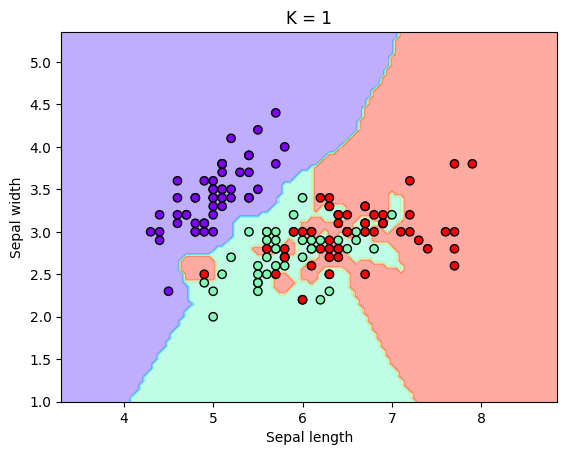

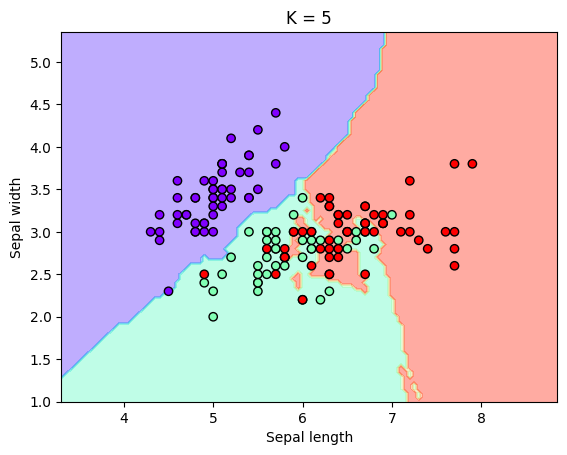

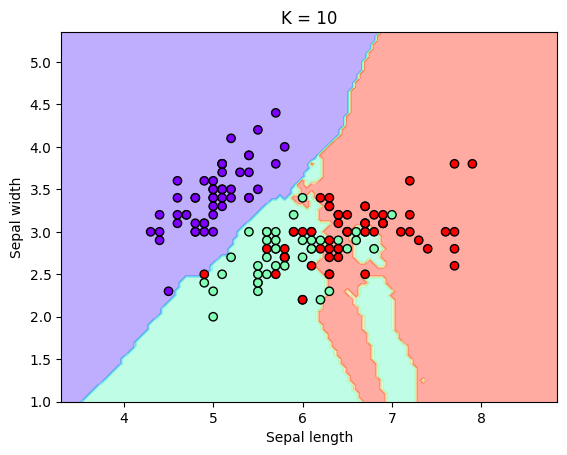

In [83]:
#Implement KNN for classification (e.g., Iris dataset). Experiment with different values of k and visualize decision boundaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# Load Iris dataset (only first 2 features for 2D plot)
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Plot decision boundary for given k
def plot_knn(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)

    # Create mesh grid
    h = 0.05
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on mesh grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.rainbow)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.rainbow, edgecolors='k')
    plt.title(f"K = {k}")
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    plt.show()

# Try different k values
for k in [1, 5, 10]:
    plot_knn(k)




In [97]:
#SVM classifier for heart disease prediction.
import pandas as pd
from sklearn.svm import SVC

# Load dataset
df = pd.read_csv('dataset.csv')

# Drop missing values (if any)
df = df.dropna()

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Manual split (first 80% train, last 20% test)
split = int(len(df) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Train SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Basic accuracy (no metrics module)
correct = (predictions == y_test).sum()
total = len(y_test)
print("Accuracy:", correct / total)



Accuracy: 0.6229508196721312


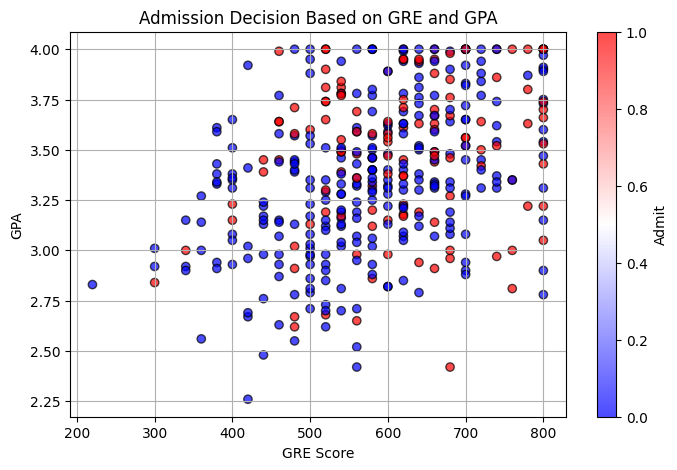

C:\Users\HUDA\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


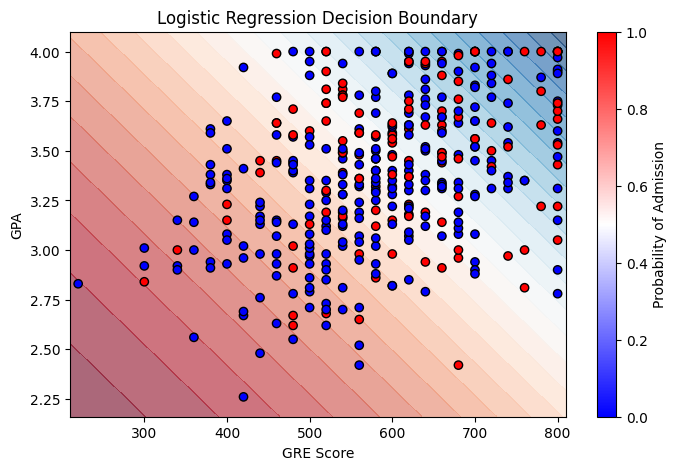

In [118]:
#Logistic regression for university admission prediction.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load dataset
df = pd.read_csv('admission.csv')

# Features and target
X = df[['gre', 'gpa']]
y = df['admit']

# Train model
model = LogisticRegression()
model.fit(X, y)

# 🌈 Scatter plot (GPA vs GRE) colored by admit
plt.figure(figsize=(8, 5))
plt.scatter(df['gre'], df['gpa'], c=y, cmap='bwr', edgecolors='k', alpha=0.7)
plt.xlabel('GRE Score')
plt.ylabel('GPA')
plt.title('Admission Decision Based on GRE and GPA')
plt.grid(True)
plt.colorbar(label='Admit')
plt.show()

# 🎯 Decision Boundary (2D)
# Generate mesh grid
x_min, x_max = X['gre'].min() - 10, X['gre'].max() + 10
y_min, y_max = X['gpa'].min() - 0.1, X['gpa'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

# Plot contour and scatter
plt.figure(figsize=(8, 5))
plt.contourf(xx, yy, probs, 25, cmap="RdBu", alpha=0.6)
plt.scatter(X['gre'], X['gpa'], c=y, cmap="bwr", edgecolors='k')
plt.xlabel('GRE Score')
plt.ylabel('GPA')
plt.title('Logistic Regression Decision Boundary')
plt.colorbar(label='Probability of Admission')
plt.show()


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


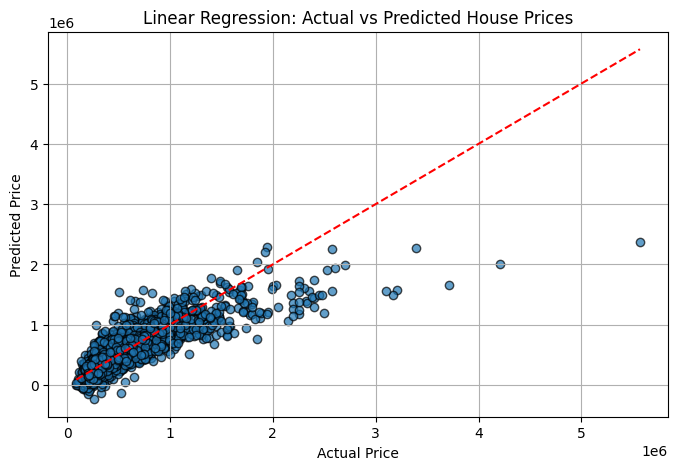

In [120]:
#Linear regression with multiple variables (house prices).
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv('Housing.csv')

# Check columns
print(df.columns)

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted House Prices')
plt.grid(True)
plt.show()


Accuracy: 0.95


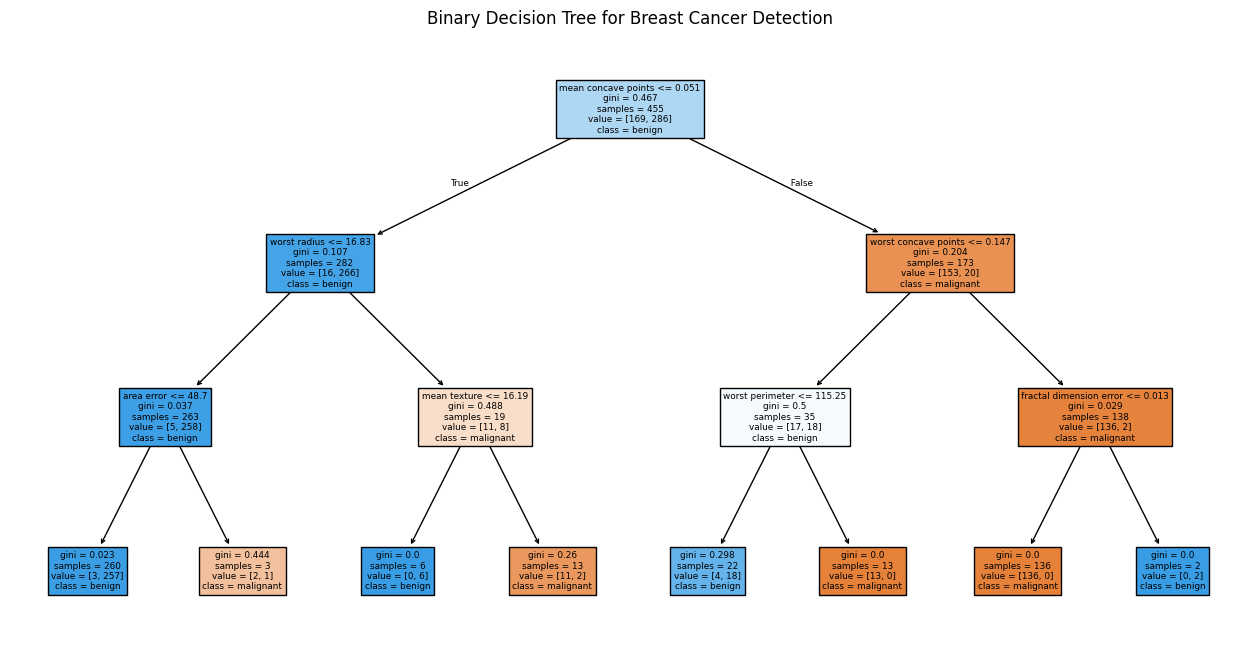

In [122]:
#Binary decision tree for breast cancer detection.
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # 0 = malignant, 1 = benign

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.2f}")

# Plot tree
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=data.target_names, filled=True)
plt.title("Binary Decision Tree for Breast Cancer Detection")
plt.show()
